In [30]:
# pip install python-binance
import pandas as pd
import numpy as np
from binance.client import Client
import plotly.graph_objects as go
import requests
import time
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

from scipy.stats import bernoulli
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import os

# Binance API credentials
api_key = 'zMMoF47K9D6u1UrEs0SF5ZgwDtYsLfZYPPd2hDme5XtUJJOd6gogsVw8ibNu7mxM'
api_secret = 'xPqzQ87NvKFawOcYizIC81Ui3s7oQsBxPvXaD4t7LR85AtUhYeJL9XLnvwmoLPLN'

#Telegram Bot
TOKEN = "7440240128:AAHGgBidb-mEjSOfzWXJ2hzY8UupUDlvKEs"
CHAT_ID = "5097888685"

# Initialize Binance client
client = Client(api_key, api_secret)

In [2]:
def get_historical_klines(symbol, interval, lookback):
    """
    Fetch historical klines (candlestick) data from Binance.
    :param symbol: Trading pair symbol (e.g., 'BTCUSDT')
    :param interval: Timeframe for candlesticks (e.g., '1h', '1d')
    :param lookback: Lookback period (e.g., '1 day ago UTC',2 months ago UTC)
    :return: Pandas DataFrame with OHLCV data
    """
    try:
        klines = client.get_historical_klines(symbol, interval, lookback)
        df = pd.DataFrame(klines, columns=[
            'timestamp', 'open', 'high', 'low', 'close', 'volume', 
            'close_time', 'quote_asset_volume', 'number_of_trades', 
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        time_to_add = pd.Timedelta(hours=5, minutes=30)
        df['timestamp'] = df['timestamp']+time_to_add
        df['date'] = df['timestamp'].apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))
        #df.set_index('timestamp', inplace=True)
        df['loc_index'] = list(range(len(df)))
        df['open'] = df.open.astype(float)
        df['high'] = df.high.astype(float)
        df['low'] = df.low.astype(float)
        df['close'] = df.close.astype(float)
        df['volume'] = df.volume.astype(float)
        #df = df.astype(float)
        return df
    except Exception as e:
        raise Exception(f"Error fetching data: {e}")
    


In [3]:
# Get Data
symbol = 'BTCUSDT'  # Trading pair symbol
interval = '5m'  # Time interval (e.g., '1h', '1d')
lookback = '1 day ago UTC'  # Lookback period

# Fetch data
df = get_historical_klines(symbol, interval, lookback)
df.to_csv('currentData.csv')

#df.dtypes
# print("First element")
# print(df.iloc[0, 0])
# print("First element")
# print(df.iloc[-1, 0])

#last close value
#print(df.iloc[-1,4])
df

,timestamp,open,high,low,close,volume,date,loc_index
0,2025-02-18 20:55:00,95581.89,95653.40,95368.52,95403.51,73.11079,2025-02-18,0
1,2025-02-18 21:00:00,95403.51,95530.39,95362.25,95415.00,67.81579,2025-02-18,1
2,2025-02-18 21:05:00,95414.99,95722.73,95404.85,95649.13,75.64753,2025-02-18,2
3,2025-02-18 21:10:00,95649.14,95718.68,95530.30,95531.77,79.68790,2025-02-18,3
4,2025-02-18 21:15:00,95531.77,95598.36,95383.76,95456.65,74.76426,2025-02-18,4
...,...,...,...,...,...,...,...,...
283,2025-02-19 20:30:00,95766.33,95816.00,95571.47,95749.51,122.43429,2025-02-19,283
284,2025-02-19 20:35:00,95749.51,95942.08,95536.36,95675.74,189.87079,2025-02-19,284
285,2025-02-19 20:40:00,95675.74,95815.75,95675.74,95774.01,79.01059,2025-02-19,285
286,2025-02-19 20:45:00,95774.01,96030.45,95680.01,95963.74,79.93414,2025-02-19,286


In [16]:
#Send telegram message
message = "hello, world"
url = f"https://api.telegram.org/bot{TOKEN}/sendMessage?chat_id={CHAT_ID}&text={message}"
r= requests.get(url)
print(r.json())

#Send telegram pictures
files = {'photo': open('alert/alert.PNG', 'rb')}
resp = requests.post('https://api.telegram.org/bot7440240128:AAHGgBidb-mEjSOfzWXJ2hzY8UupUDlvKEs/sendPhoto?chat_id=5097888685', files=files)
print(resp.json())

{'ok': True, 'result': {'message_id': 9, 'from': {'id': 7440240128, 'is_bot': True, 'first_name': 'Aladdin 2.0', 'username': 'Aladdin007_BOT'}, 'chat': {'id': 5097888685, 'first_name': 'Souvik', 'username': 'SouvikDaw', 'type': 'private'}, 'date': 1739804656, 'text': 'hello, world'}}
{'ok': True, 'result': {'message_id': 10, 'from': {'id': 7440240128, 'is_bot': True, 'first_name': 'Aladdin 2.0', 'username': 'Aladdin007_BOT'}, 'chat': {'id': 5097888685, 'first_name': 'Souvik', 'username': 'SouvikDaw', 'type': 'private'}, 'date': 1739804657, 'photo': [{'file_id': 'AgACAgUAAxkDAAMIZ7NPVYspqrzf_t7fiIaU8oQqEkMAAh7EMRu665hVMqmA_27tIM4BAAMCAANzAAM2BA', 'file_unique_id': 'AQADHsQxG7rrmFV4', 'file_size': 750, 'width': 90, 'height': 45}, {'file_id': 'AgACAgUAAxkDAAMIZ7NPVYspqrzf_t7fiIaU8oQqEkMAAh7EMRu665hVMqmA_27tIM4BAAMCAANtAAM2BA', 'file_unique_id': 'AQADHsQxG7rrmFVy', 'file_size': 11101, 'width': 320, 'height': 161}, {'file_id': 'AgACAgUAAxkDAAMIZ7NPVYspqrzf_t7fiIaU8oQqEkMAAh7EMRu665hVMqmA_27

In [4]:
def candlestick_ax(t, o, h, l, c):
    t_index = list(range(len(t)))

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)

    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    ax.bar(x=t_index, height=h-l, bottom=l, width=0.1, color=color)
    ax.bar(x=t_index, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)

    t_loc = t_index[::7200]
    #if type(t[0]) == datetime or type(t[0]) == pd._libs.tslibs.timestamps.Timestamp:
    #    label_loc = [datetime.strftime(x, '%H-%M') for x in t[::12]]
    label_loc = [x[:10] for x in t[::7200]]
    ax.set_xticks(ticks=t_loc, labels=label_loc, rotation=45);

    return ax

In [34]:
def get_init_slope_intercept(df):
    # best fit line
    X = df[['loc_index']].values  # Independent variable
    y = df['mid'].values  # Dependent variable

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients
    slope = model.coef_[0]
    intercept = model.intercept_

    best_fit = X*slope + intercept

    df['candle_bottom'] = df[['open', 'close']].min(axis=1)
    offsets = df['candle_bottom'].values - best_fit[:,0]
    min_offset = min(offsets)
    intercept_2 = intercept + min_offset
    best_fit_2 = X*slope + intercept_2

    return slope, intercept_2

def get_best_fit_slope_intercept(df):
    # best fit line
    X = df[['loc_index']].values  # Independent variable
    y = df['mid'].values  # Dependent variable

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept




# Objective function to minimize: sum of squared differences
def objective(params, X, candle_bottom):
    m, b = params
    line = m * X + b
    return np.sum((line - candle_bottom) ** 2)

# Constraint function to ensure line stays below the candle bottom
def constraint(params, X, candle_bottom):
    m, b = params
    line = m * X + b
    return candle_bottom - line  # We want all values of (candle_bottom - line) >= 0


def get_final_slope_intercept(df_new,slope_init, intercept_init):
    # Initial parameters for optimization
    initial_params = [slope_init, intercept_init]
    X = df_new[['loc_index']].values

    # Defining constraints as a dictionary format
    constraints = {
        'type': 'ineq',  # For inequality (>= 0)
        'fun': constraint,
        'args': (X.flatten(), df_new['candle_bottom'].values)
    }

    # Perform the optimization
    result = minimize(
        objective,
        initial_params,
        args=(X.flatten(), df_new['candle_bottom'].values),
        constraints=constraints,
        method='SLSQP'
    )

    optimized_slope, optimized_intercept = result.x

    return optimized_slope, optimized_intercept

def visualize_trendline(df_new, slope, intercept):
    _ax = candlestick_ax(t=df_new['date'], o=df_new['open'], h=df_new['high'], l=df_new['low'], c=df_new['close'])
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X*slope + intercept
    plt.plot(X - min(X), best_fit_init[:,0], 'b-')

def safegraph(df_new, slope, intercept,name):
    _ax = candlestick_ax(t=df_new['date'], o=df_new['open'], h=df_new['high'], l=df_new['low'], c=df_new['close'])
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X*slope + intercept
    plt.plot(X - min(X), best_fit_init[:,0], 'b-')
    file_path = os.path.join("alert", name)
    plt.savefig(file_path)

def candles_close_to_trendline(df_new, slope, intercept):
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X*slope + intercept
    trendline_dist = df_new['candle_bottom'].values - best_fit_init[:,0]
    return best_fit_init[-1,0]

def dist_from_trendline(df_new, slope, intercept, percentile=50):
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X*slope + intercept
    trendline_dist = df_new['candle_bottom'].values - best_fit_init[:,0]
    return np.nanpercentile(trendline_dist, percentile)


From Time
2025-02-19 20:35:00
To Time
2025-02-19 21:34:00


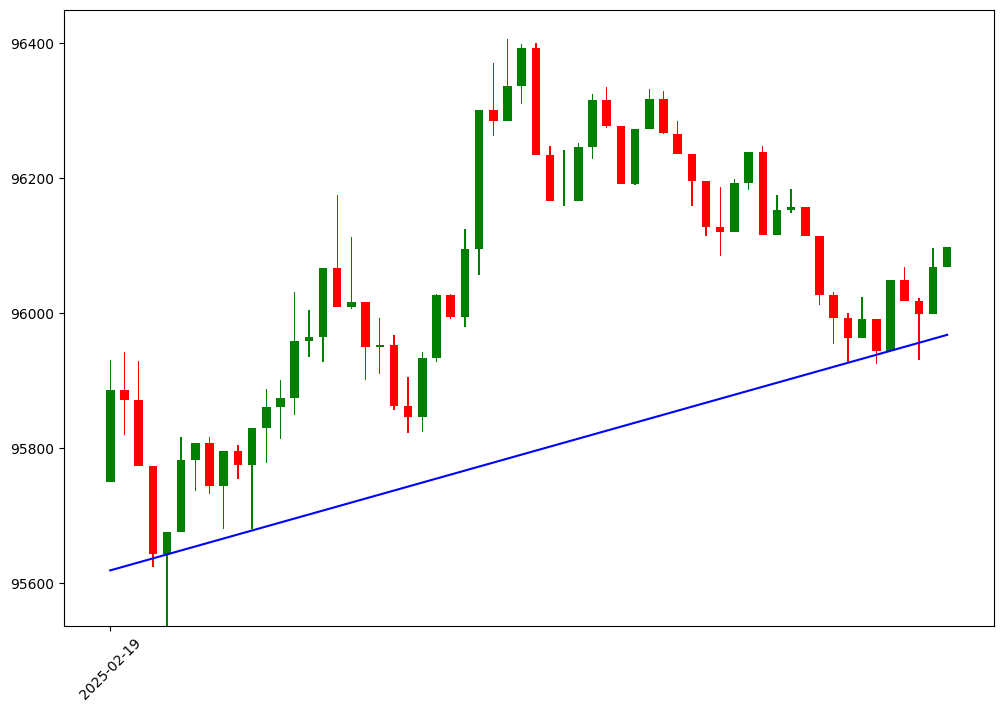

In [37]:
#1 hour analysis
symbol = 'BTCUSDT'  
interval = '1m'  
lookback = '1 hours ago UTC'

# Fetch data
df = get_historical_klines(symbol, interval, lookback)
print("From Time")
print(df.iloc[0, 0])
print("To Time")
print(df.iloc[-1, 0])

#_ax = candlestick_ax(t=df['date'], o=df['open'], h=df['high'], l=df['low'], c=df['close'])
df['mid'] = (df['open'] + df['close'])/2
slope_0, intercept_0 = get_best_fit_slope_intercept(df)
slope_init, intercept_init = get_init_slope_intercept(df)
slope_final, intercept_final = get_final_slope_intercept(df, slope_init, intercept_init)
visualize_trendline(df, slope_final, intercept_final)

support = candles_close_to_trendline(df, slope_final, intercept_final)
current = df.iloc[-1,4]

if (abs(current-support))<100:
    print("close")
    name = str(int(current)) +" at "+ str(int(support))+".png"
    safegraph(df, slope_final, intercept_final,name)
